In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import kinetic_monte_carlo as kmc

## Two species converting into each other in one box

In [2]:
n_species = 2
n_boxes = 1
diffusivity_0 = np.array([[0.]])  # species 0
diffusivity_1 = np.array([[0.]])  # species 1
diffusivity = np.array([diffusivity_0, diffusivity_1])
init_state = np.array([[70, 0]], dtype=np.int)
system = kmc.ReactionDiffusionSystem(diffusivity, n_species, n_boxes, init_state)
system.add_conversion(0, 1, np.array([4.]))
system.add_conversion(1, 0, np.array([0.5]))

In [3]:
system.simulate(300)

[KMC] [2017-06-15 10:59:49] [INFO] Simulate for 300 steps


In [4]:
time_series, times = system.convert_events_to_time_series(n_frames=1000)

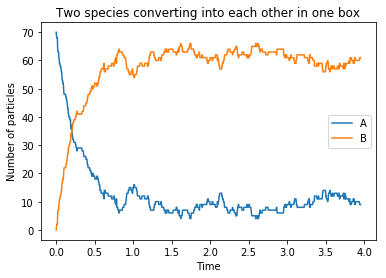

In [5]:
plt.plot(times, time_series[:,0,0], label="A")
plt.plot(times, time_series[:,0,1], label="B")
plt.legend(loc="best")
plt.xlabel("Time")
plt.ylabel("Number of particles")
plt.title("Two species converting into each other in one box")
plt.show()

## The same as above but fewer particles

In [6]:
n_species = 2
n_boxes = 1
diffusivity_0 = np.array([[0.]])  # species 0
diffusivity_1 = np.array([[0.]])  # species 1
diffusivity = np.array([diffusivity_0, diffusivity_1])
reactions = [kmc.Conversion(0, 1, np.array([4.]), n_species, n_boxes), kmc.Conversion(1, 0, np.array([0.5]), n_species, n_boxes)]
init_state = np.array([[30, 0]], dtype=np.int)
system = kmc.ReactionDiffusionSystem(diffusivity, n_species, n_boxes, init_state)
system.add_conversion(0, 1, np.array([4.]))
system.add_conversion(1, 0, np.array([0.5]))

In [7]:
system.simulate(120)

[KMC] [2017-06-15 10:59:49] [INFO] Simulate for 120 steps


In [8]:
time_series, times = system.convert_events_to_time_series(n_frames=10000)

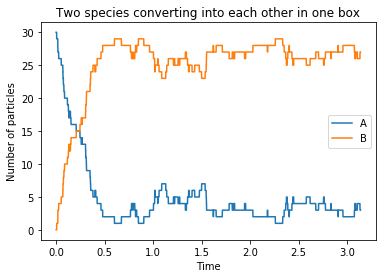

In [9]:
plt.plot(times, time_series[:,0,0], label="A")
plt.plot(times, time_series[:,0,1], label="B")
plt.legend(loc="best")
plt.xlabel("Time")
plt.ylabel("Number of particles")
plt.title("Two species converting into each other in one box")
plt.show()

## Two boxes, three species, Fusion and Fission

In [10]:
n_species = 3
n_boxes = 2
diffusivity_0 = np.array([[0., 0.15], [0.15, 0.]])  # species 0
diffusivity_1 = np.array([[0., 0.1], [0.1, 0.]])  # species 1
diffusivity_2 = np.array([[0., 0.05], [0.05, 0.]])  # species 2
diffusivity = np.array([diffusivity_0, diffusivity_1, diffusivity_2])
init_state = np.array([[80, 0, 0], [0, 50, 0]], dtype=np.int)
system = kmc.ReactionDiffusionSystem(diffusivity, n_species, n_boxes, init_state)
system.add_fusion(0, 1, 2, np.array([4., 4.]))
system.add_fission(2, 0, 1, np.array([0.5, 0.5]))

In [11]:
system.simulate(1000)

[KMC] [2017-06-15 10:59:50] [INFO] Simulate for 1000 steps


In [12]:
time_series, times = system.convert_events_to_time_series(n_frames=10000)

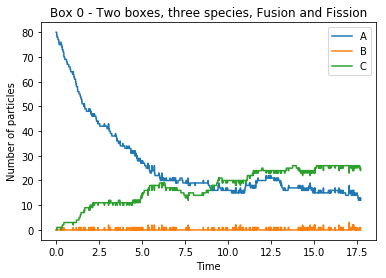

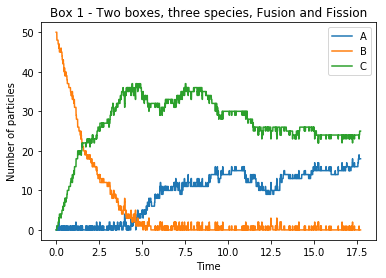

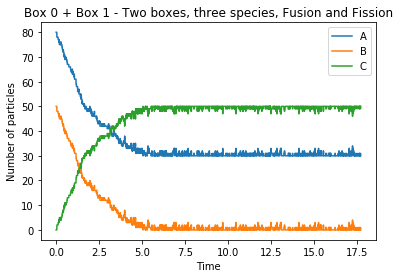

In [13]:
plt.plot(times, time_series[:,0,0], label="A")
plt.plot(times, time_series[:,0,1], label="B")
plt.plot(times, time_series[:,0,2], label="C")
plt.xlabel("Time")
plt.ylabel("Number of particles")
plt.legend(loc="best")
plt.title("Box 0 - Two boxes, three species, Fusion and Fission")
plt.show()
plt.plot(times, time_series[:,1,0], label="A")
plt.plot(times, time_series[:,1,1], label="B")
plt.plot(times, time_series[:,1,2], label="C")
plt.xlabel("Time")
plt.ylabel("Number of particles")
plt.legend(loc="best")
plt.title("Box 1 - Two boxes, three species, Fusion and Fission")
plt.show()
plt.plot(times, time_series[:,0,0]+time_series[:,1,0], label="A")
plt.plot(times, time_series[:,0,1]+time_series[:,1,1], label="B")
plt.plot(times, time_series[:,0,2]+time_series[:,1,2], label="C")
plt.xlabel("Time")
plt.ylabel("Number of particles")
plt.legend(loc="best")
plt.title("Box 0 + Box 1 - Two boxes, three species, Fusion and Fission")
plt.show()